In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
ntoys = 3

nits = 1000000

binwidth = 1
nbins = int(50./binwidth)
bins = [i*binwidth-25 for i in range(nbins)]

width_coefficient = 0.1

def L(x):
    mu = 4
    sig = 1
    return 1 #np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [3]:
parameterrange=[0,25]
width0 = width_coefficient*(parameterrange[1]-parameterrange[0])

init_points = [random.uniform(parameterrange[0],parameterrange[1]) for i in range(ntoys-1)]

init_points += [0.1]

print(init_points)

[3.1080273526873095, 24.623503350291777, 0.1]


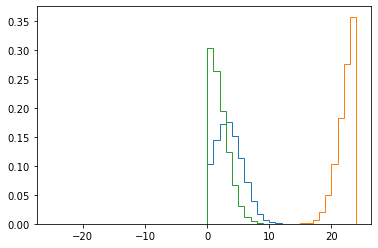

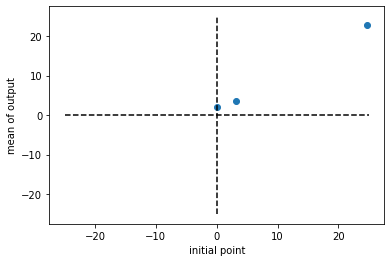

In [4]:
# linear stepping, positive def parameter

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0
    
    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(input_point,width0)
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [parametervalue]
            likelihood = L(parametervalue)
            its += 1
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

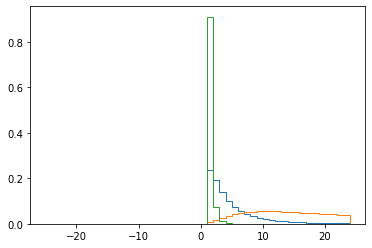

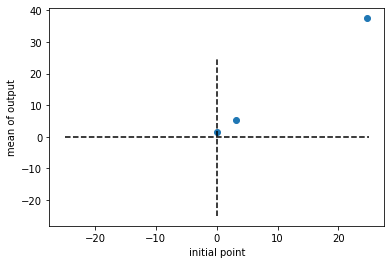

In [5]:
# log stepping, positive def parameter

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0

    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(np.log(input_point),np.log(width0))
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [np.exp(parametervalue)]
            its += 1
            likelihood = L(np.exp(parametervalue))
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

In [6]:
parameterrange=[-25,25]
width0 = width_coefficient*(parameterrange[1]-parameterrange[0])

init_points = [random.uniform(parameterrange[0],parameterrange[1]) for i in range(ntoys-1)]
init_points += [0.1]

print(init_points)

[16.994005569073927, -24.61614893710116, 0.1]


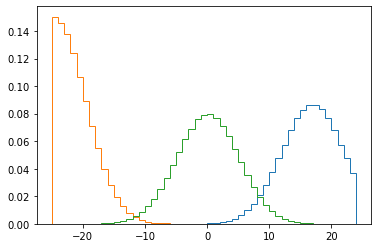

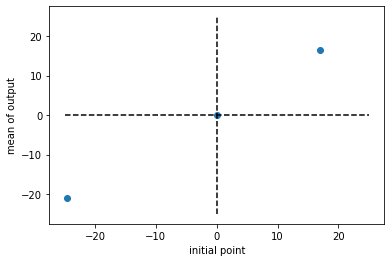

In [7]:
# linear stepping, parameter with negative values

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0

    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(input_point,width0)
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [parametervalue]
            its += 1
            likelihood = L(parametervalue)
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

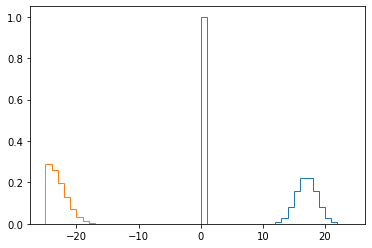

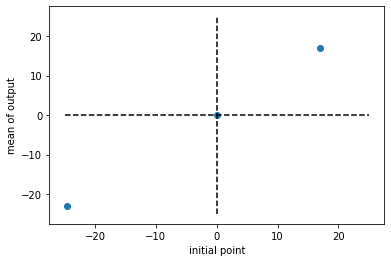

In [8]:
# linear stepping, variable width
# parameter with negative values

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0

    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(input_point,0.1*abs(input_point))
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [parametervalue]
            its += 1
            likelihood = L(parametervalue)
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

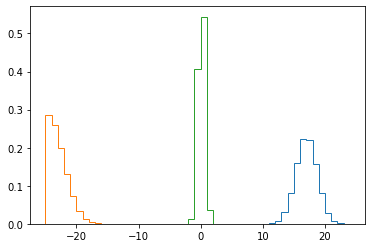

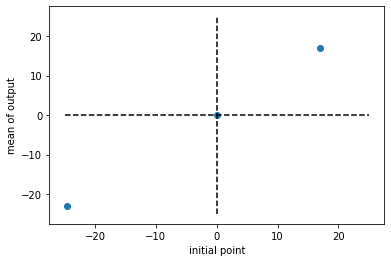

In [9]:
# linear stepping, variable width with minimum
# parameter with negative values

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0

    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            width = max(0.1*width0,0.1*abs(input_point))
            parametervalue = random.gauss(input_point,width)
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [parametervalue]
            its += 1
            likelihood = L(parametervalue)
    toys += 1

means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()

plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

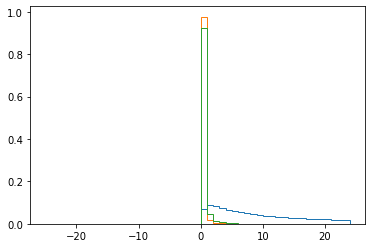

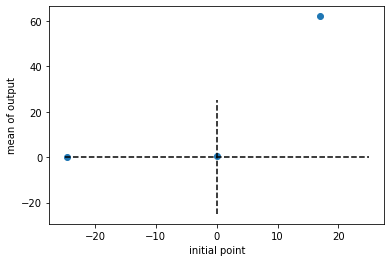

In [10]:
# log stepping, constant width
# parameter with negative values

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    likelihood = 0
    
    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(np.sign(input_point)*np.log(abs(input_point)),np.log(width0))
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [np.exp(parametervalue)]
            its += 1
            likelihood = L(parametervalue)
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

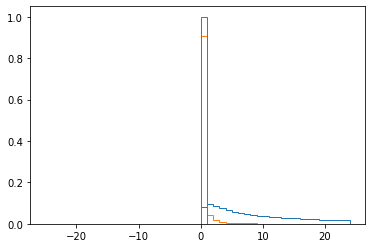

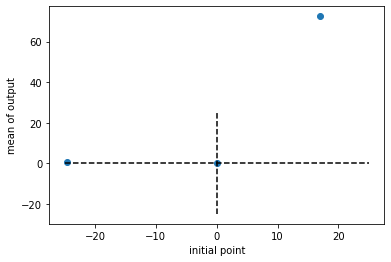

In [11]:
# log stepping, variable width
# parameter with negative values

parameterrange=[-25,25]
width0 = width_coefficient*(parameterrange[1]-parameterrange[0])

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    
    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            parametervalue = random.gauss(np.sign(input_point)*np.log(abs(input_point)),0.1*abs(input_point))
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [np.exp(parametervalue)]
            its += 1
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()

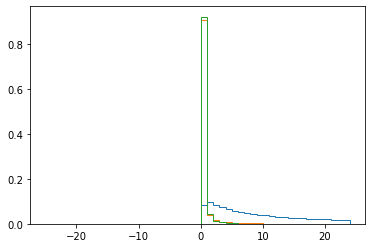

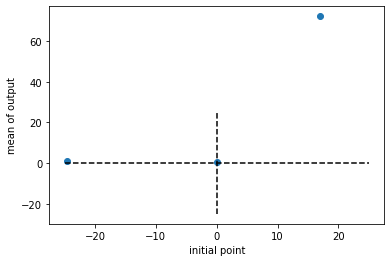

In [12]:
# log stepping, variable width with minimum
# parameter with negative values

parameterrange=[-25,25]
width0 = width_coefficient*(parameterrange[1]-parameterrange[0])

values = []
toys = 0

while toys < ntoys:
    its = 0
    values += [[]]
    
    while its < nits:
        in_range = False
        while not in_range:
            input_point = init_points[toys]
            width = max(np.log(width0),0.1*abs(input_point))
            parametervalue = random.gauss(np.sign(input_point)*np.log(abs(input_point)),width)
            in_range = parametervalue > parameterrange[0] and parametervalue < parameterrange[1]
        if L(parametervalue) >= likelihood:
            values[toys] += [np.exp(parametervalue)]
            its += 1
    toys += 1
    
means = []
for i in range(ntoys):
    plt.hist(values[i],bins=bins,density=True,histtype='step')
    means += [np.mean(values[i])]
plt.show()
    
plt.scatter(init_points,means)
plt.plot([-25,25],[0,0],'k--')
plt.plot([0,0],[-25,25],'k--')
plt.xlabel('initial point')
plt.ylabel('mean of output')
plt.show()